In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [4]:
train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

In [5]:
#train.head()

In [6]:
train = train[train.Sex != "."]

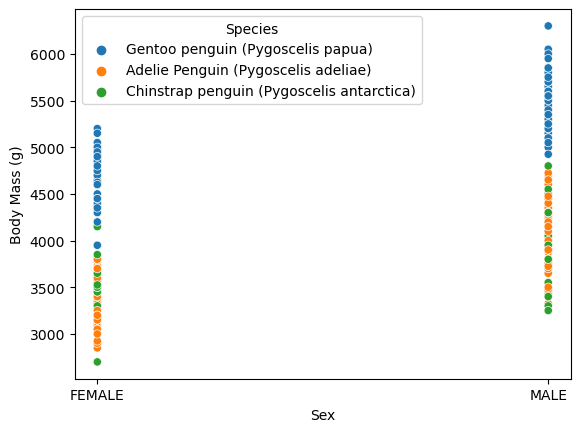

In [7]:
# sns.set_theme(style="whitegrid", palette = "muted")

# ax = sns.swarmplot(data = train, x = "Body Mass (g)", y = "Sex", hue = "Species")
# ax.set(ylabel = "")
# plt.show()
# sns.pairplot(train, hue= "Species")
# swarm plot
sns.scatterplot(x = "Sex", y = "Body Mass (g)", hue = "Species", data = train)
plt.show()

In [8]:
def read_data(url):
  df = pd.read_csv(url)
  y = df["Body Mass (g)"]
  X = df.drop(["Body Mass (g)", "Species"], axis = 1)
  return df, X, y

In [9]:
train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"

df_train, X_train, y_train = read_data(train_url)

In [10]:
#y_train.head()
train = pd.get_dummies(train, columns = ["Sex"], drop_first = "if_binary")
X_train = pd.get_dummies(X_train, columns = ["Sex"], drop_first = "if_binary")
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Sex_MALE
0,PAL0708,27,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,11/29/07,44.5,14.3,216.0,4100.0,7.96621,-25.69327,NaN,0
1,PAL0708,22,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N41A2,Yes,11/27/07,45.1,14.5,215.0,5000.0,7.63220,-25.46569,NaN,0
2,PAL0910,124,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N67A2,Yes,11/16/09,41.4,18.5,202.0,3875.0,9.59462,-25.42621,NaN,1
3,PAL0910,146,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N82A2,Yes,11/16/09,39.0,18.7,185.0,3650.0,9.22033,-26.03442,NaN,1
4,PAL0708,24,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N85A2,No,11/28/07,50.6,19.4,193.0,3800.0,9.28153,-24.97134,NaN,1


In [11]:
X_train.head()

,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Sex_FEMALE,Sex_MALE
0,PAL0708,27,Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,11/29/07,44.5,14.3,216.0,7.96621,-25.69327,NaN,0,0
1,PAL0708,22,Anvers,Biscoe,"Adult, 1 Egg Stage",N41A2,Yes,11/27/07,45.1,14.5,215.0,7.63220,-25.46569,NaN,1,0
2,PAL0910,124,Anvers,Torgersen,"Adult, 1 Egg Stage",N67A2,Yes,11/16/09,41.4,18.5,202.0,9.59462,-25.42621,NaN,0,1
3,PAL0910,146,Anvers,Dream,"Adult, 1 Egg Stage",N82A2,Yes,11/16/09,39.0,18.7,185.0,9.22033,-26.03442,NaN,0,1
4,PAL0708,24,Anvers,Dream,"Adult, 1 Egg Stage",N85A2,No,11/28/07,50.6,19.4,193.0,9.28153,-24.97134,NaN,0,1


In [12]:
# train = pd.get_dummies(train, columns = ['Sex'], drop_first = "if_binary")

train.groupby('Species')[['Body Mass (g)', 'Sex_MALE']].aggregate([np.mean, len]).round(2)

Body Mass (g)      Sex_MALE     
                                                   mean  len     mean  len
Species                                                                   
Adelie Penguin (Pygoscelis adeliae)             3667.09  118     0.47  118
Chinstrap penguin (Pygoscelis antarctica)       3717.86   56     0.48   56
Gentoo penguin (Pygoscelis papua)               5121.97  100     0.54  100

-----
When looking at the species of penguins and their body mass, I can see that the Gentoo penguins are, on average, much larger in body mass than the chinstrap penguins and the adelie penguins. 

<AxesSubplot: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

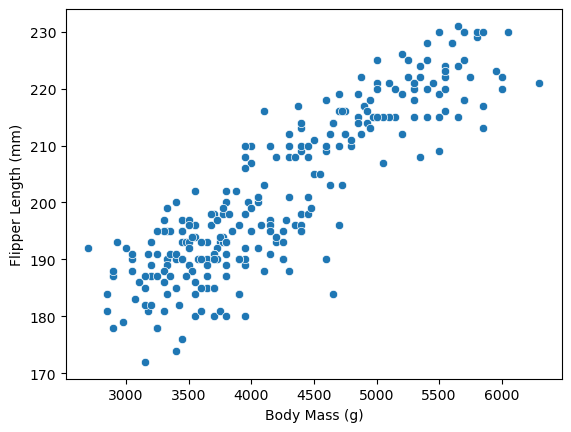

In [13]:
sns.scatterplot(data=train, x='Body Mass (g)', y='Flipper Length (mm)')

In [14]:
grouped = train.groupby('Species')['Body Mass (g)', 'Flipper Length (mm)'].aggregate(['mean', 'median', 'std'])
grouped

/var/folders/k5/sv5thph578dff6sqh3h3z2kw0000gn/T/ipykernel_25399/3046570246.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = train.groupby('Species')['Body Mass (g)', 'Flipper Length (mm)'].aggregate(['mean', 'median', 'std'])


Body Mass (g)                      \
                                                   mean  median         std   
Species                                                                       
Adelie Penguin (Pygoscelis adeliae)         3667.094017  3650.0  455.209898   
Chinstrap penguin (Pygoscelis antarctica)   3717.857143  3687.5  404.876925   
Gentoo penguin (Pygoscelis papua)           5121.969697  5100.0  511.653391   

                                          Flipper Length (mm)                   
                                                         mean median       std  
Species                                                                         
Adelie Penguin (Pygoscelis adeliae)                189.965812  190.0  6.678493  
Chinstrap penguin (Pygoscelis antarctica)          195.464286  195.0  7.032300  
Gentoo penguin (Pygoscelis papua)                  217.656566  217.0  6.438344

In [27]:
X_train.head()

,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Sex_FEMALE,Sex_MALE
0,PAL0708,27,Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,11/29/07,44.5,14.3,216.0,7.96621,-25.69327,NaN,0,0
1,PAL0708,22,Anvers,Biscoe,"Adult, 1 Egg Stage",N41A2,Yes,11/27/07,45.1,14.5,215.0,7.63220,-25.46569,NaN,1,0
2,PAL0910,124,Anvers,Torgersen,"Adult, 1 Egg Stage",N67A2,Yes,11/16/09,41.4,18.5,202.0,9.59462,-25.42621,NaN,0,1
3,PAL0910,146,Anvers,Dream,"Adult, 1 Egg Stage",N82A2,Yes,11/16/09,39.0,18.7,185.0,9.22033,-26.03442,NaN,0,1
4,PAL0708,24,Anvers,Dream,"Adult, 1 Egg Stage",N85A2,No,11/28/07,50.6,19.4,193.0,9.28153,-24.97134,NaN,0,1


Description of the scatterplot and the table above

In [29]:
# #for loop for features

# # from sklearn.linear_model import LogisticRegression

# # LR = LogisticRegression()
# # LR.fit(X_train, y_train)
# # LR.score(X_train, y_train)
# from sklearn.linear_model import LogisticRegression

# # this counts as 3 features because the two Clutch Completion 
# # columns are transformations of a single original measurement. 
# # you should find a way to automatically select some better columns
# # as suggested in the code block above
# cols = ["Flipper Length (mm)", "Culmen Depth (mm)", "Sex_MALE"]

# LR = LogisticRegression()
# LR.fit(X_train[cols], y_train)
# LR.score(X_train[cols], y_train)
from itertools import combinations

all_qual_cols = ["Clutch Completion"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']

pair = combinations(all_quant_cols, 3)
cols = qual_cols + list(pair)
X_train_sub = X_train[cols]

/Users/kaylynnxia/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/pandas/core/common.py:245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


KeyError: "[('Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)')] not in index"

In [22]:
best_cols = []
best_acc = 0

for qual in all_qual_cols: 
    qual_cols = [col for col in X_train.columns if qual in col]
    for pair in combinations(all_quant_cols, 3):
        cols = qual_cols + list(pair)
        X_train_sub = X_train[cols]
        X_test_sub = X_test[cols]
        le = LabelEncoder()
        y_train_enc = le.fit_transform(y_train)
        y_test_enc = le.transform(y_test)
        clf = RandomForestClassifier(n_estimators=100, random_state=0)
        clf.fit(X_train_sub, y_train_enc)
        acc = clf.score(X_test_sub, y_test_enc)
        if acc == 1:
            best_cols = cols
            best_acc = acc
            break
    if best_acc == 1:
        break

NameError: name 'LabelEncoder' is not defined

In [ ]:
from itertools import combinations

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Sex"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    print(cols)
    # you could train models and score them here, keeping the list of 
    # columns for the model that has the best score. 
    # 

In [20]:
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"

df_test, X_test, y_test = read_data(test_url)
X_test = pd.get_dummies(X_test, columns = ["Species"], drop_first="if_binary")

KeyError: "None of [Index(['Species'], dtype='object')] are in the [columns]"

In [18]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # select the relevant columns
# qual_col = ["Clutch Completion", "Sex"]
# quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']

# # create the feature and target arrays
# X = train[quant_cols + [qual_col]].values
# y = train['Species'].values

# # split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# def train_and_evaluate(X_train, y_train, X_test, y_test):
#     # train the model on the training set
#     clf = RandomForestClassifier(n_estimators=100, random_state=42)
#     clf.fit(X_train, y_train)
    
#     # make predictions on the test set
#     y_pred = clf.predict(X_test)
    
#     # calculate the accuracy of the model
#     accuracy = accuracy_score(y_test, y_pred)
    
#     return accuracy

In [19]:
# from itertools import combinations

# best_accuracy = 0
# best_features = None

# for qual in [qual_col]:
#     qual_cols = [col for col in train.columns if qual in col]
#     for pair in combinations(quant_cols, 2):
#         cols = qual_cols + list(pair)
#         X_train_subset = X_train[:, [i for i, col in enumerate(train.columns) if col in cols]]
#         X_test_subset = X_test[:, [i for i, col in enumerate(train.columns) if col in cols]]
#         accuracy = train_and_evaluate(X_train_subset, y_train, X_test_subset, y_test)
#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_features = cols

# print("Best features:", best_features)
# print("Best accuracy:", best_accuracy)